In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
import scipy as scp
import pandas as pd
import copy as cp
from tqdm import tqdm 

sns.set_theme(style="darkgrid",context='talk', font_scale=1.1)
%matplotlib inline

import numpy as np

In [117]:
γ_JE  = 1
γ_RAJ = 0.45
γ_OR = 0.15
δ_E = 0.99
δ_J = 0.99
δ_RA = 0.99
δ_OA = 0.95

U_simp = np.matrix([[δ_E*(1 - γ_JE),               0,               0,    0],
                    [      δ_E*γ_JE, δ_J*(1 - γ_RAJ),               0,    0],
                    [             0,       δ_J*γ_RAJ, δ_RA*(1 - γ_OR),    0],
                    [             0,               0,       δ_RA*γ_OR, δ_OA]])

In [171]:
γ_JE  = 1
γ_DJ = 0.45
γ_RAD = 0.45
γ_RAJ = 0.45
γ_OR = 0.15
δ_E = 0.99
δ_J = 0.99
δ_D = 0.99
δ_RA = 0.99
δ_OA = 0.95

U_simp_2 = np.matrix([[δ_E*(1 - γ_JE),                          0,               0,               0,    0],
                      [      δ_E*γ_JE, δ_J*(1 - γ_RAJ)*(1 - γ_DJ),               0,               0,    0],
                      [             0,                   δ_J*γ_DJ, δ_D*(1 - γ_RAD),               0,    0],
                      [             0,                  δ_J*γ_RAJ,       δ_D*γ_RAD, δ_RA*(1 - γ_OR),    0],
                      [             0,                          0,               0,       δ_RA*γ_OR, δ_OA]])

In [250]:
def neg_dens_dep(rate, r, α, min_val):
    val = rate*r/(α + r)
    if val < min_val:
        return min_val
    else:
        return val

In [500]:
def simp_consum_resource(n0, r0, α, β, θ, c, r_growth, t, linear=True):
    γ_JE  = 1
    γ_RAJ = lambda r: 0.5*r/(α + r) if r/np.sum(n0[1] + n0[3:]) >=1 else 0.0
    γ_OR = 0.15
    γ_DJ = lambda r: β/(α + r)
    γ_RAD = lambda r: 0.5*r/(α + r) if r/np.sum(n0[1] + n0[3:]) >=1 else 0.0
    # δ_E = lambda r: 0.99  *(r)/(α + r) if r >=0 else 0.0
    # δ_J = lambda r: 0.99 *(r)/(α + r) if r  >=0 else 0.0
    # δ_RA = lambda r: 0.99 *(r)/(α + r) if r >=0 else 0.0
    # δ_OA = lambda r: 0.95 *(r)/(α + r) if r >=0 else 0.0
    δ_E = lambda r: neg_dens_dep(0.99, r, α, 0.5)
    δ_J = lambda r: neg_dens_dep(0.99, r, α, 0.5)
    δ_RA = lambda r: neg_dens_dep(0.99, r, α, 0.5)
    δ_OA = lambda r: neg_dens_dep(0.99, r, α, 0.5)
    
    δ_D = 0.99
    F = np.identity(5) * 0
    F[0][3] = γ_OR*180
    n_list = []
    r_list = []
    R0_list = []
    consump = []
    for i in range(t):
        U_simp = np.matrix([[δ_E(r0)*(1 - γ_JE),                          0,               0,               0,    0],
                            [      δ_E(r0)*γ_JE, δ_J(r0)*(1 - γ_RAJ(r0))*(1 - γ_DJ(r0)),               0,               0,    0],
                            [             0,                   δ_J(r0)*γ_DJ(r0), δ_D*(1 - γ_RAD(r0)),               0,    0],
                            [             0,                  δ_J(r0)*γ_RAJ(r0),       δ_D*γ_RAD(r0), δ_RA(r0)*(1 - γ_OR),    0],
                            [             0,                          0,               0,       δ_RA(r0)*γ_OR, δ_OA(r0)]])
        n0 = np.array(np.matmul(U_simp + F, n0))
        if linear:
            r0 = 2*r0 + θ - c*np.sum(n0[1] + n0[3:])
        else:
            a = 0.1
            b = 100
            r0 = r0 + r_growth*r0 + θ - np.divide(a*np.sum(n0[1] + n0[3:]), b + np.sum(n0[1] + n0[3:]))            
        if r0 < 0:
            r0 = 0
        n_list.append(n0)
        r_list.append(r0)
        consump.append(c*np.sum(n0[1] + n0[3:]))
        fund_mat = np.linalg.inv(np.identity(5) - U_simp)
        R0_list.append(np.linalg.eig(F*fund_mat))
    return n_list, r_list, R0_list, consump

In [514]:
n0 = np.array([[0], [0], [0], [1], [0]])
r0 = 0
α = 100
β = 50
r_growth = 0
θ = 1
c = 0.8
test = simp_consum_resource(n0, r0, α, β, θ, c, r_growth, 100, linear=True)

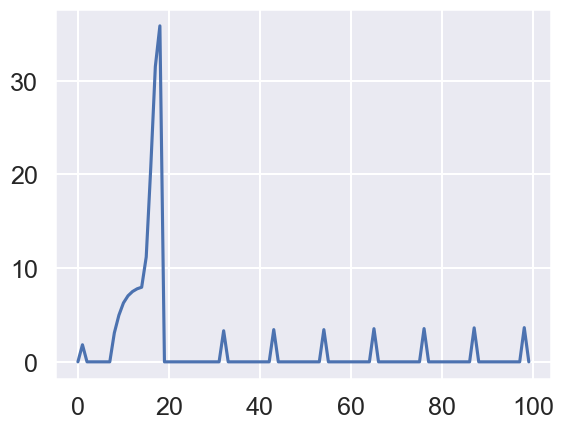

In [515]:
plt.plot([i[0][0] for i in test[2]])

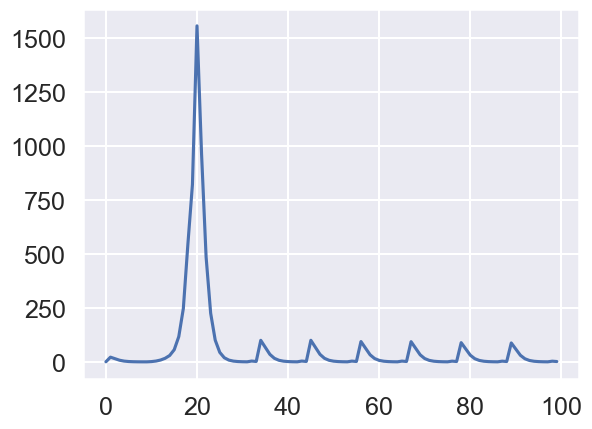

In [516]:
plt.plot(test[3])

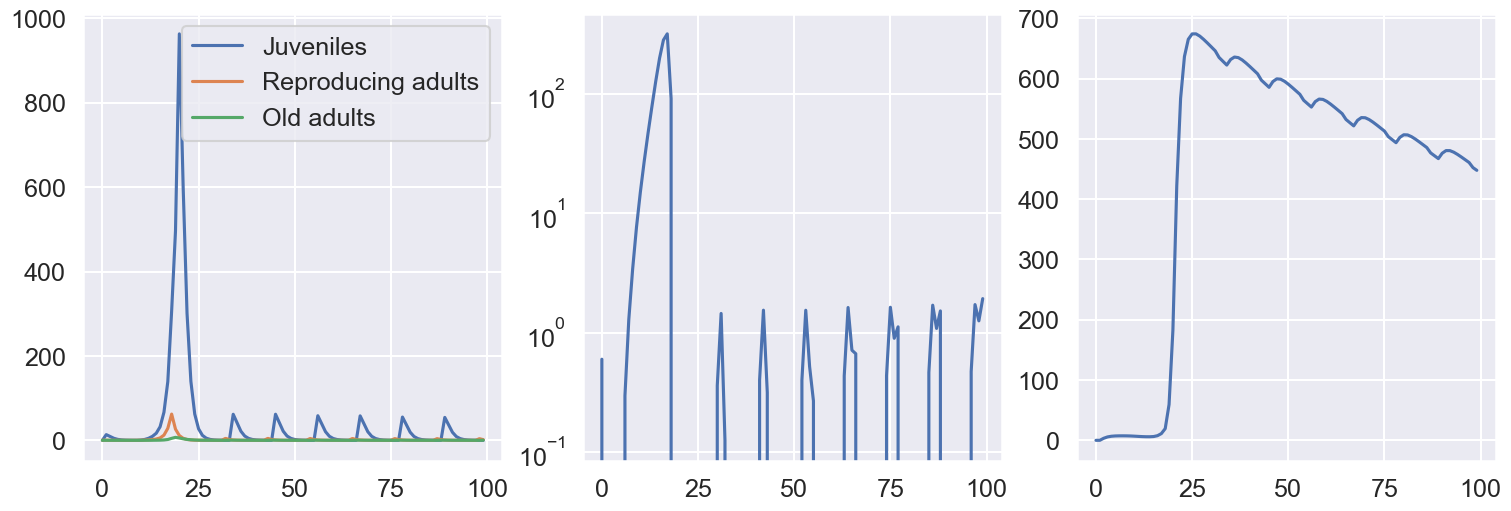

In [517]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=3,
    figsize=(15, 5),
    constrained_layout=True)

axes = axes.flatten()

# for i,j in zip(range(4), ['E', 'J', 'RA', 'OA']):
#     plt.plot([m[i][0] for m in n_list], label=j)

axes[0].plot([m[1][0] for m in test[0]], label='Juveniles')
axes[0].plot([m[3][0] for m in test[0]], label='Reproducing adults')
axes[0].plot([m[4][0] for m in test[0]], label='Old adults')
    
axes[1].plot(test[1])


axes[1].set_yscale('log')


axes[2].plot([m[2][0] for m in test[0]])
    
axes[0].legend()

In [ ]:
n_d = np.array([[0], [0] , [0], [0]])

In [499]:
test[1]

[49.6,
 87.4,
 168.18881985582635,
 333.46912341976724,
 614.1159339401075,
 1075.9169372251874,
 1856.683728335535,
 2775.483392693205,
 2654.5768272592495,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3.3002554023833195,
 13.68620656844482,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3.130089382341666,
 13.274906540562345,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1.604432744939265,
 9.590692437200202,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2.1922147760915323,
 11.008698245096951,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5.6462120509197655,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3.468719939932221,
 14.094219721806331,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3.260936689491185]

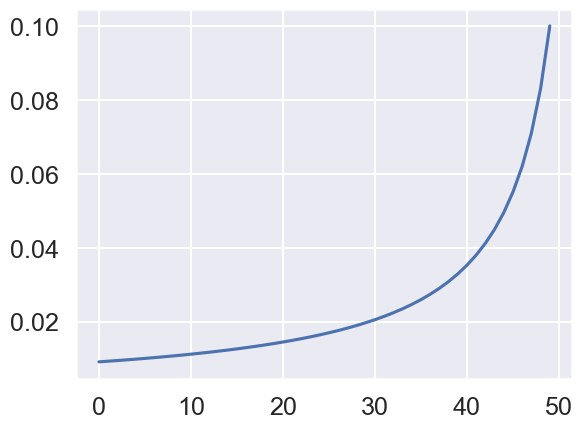

In [457]:
α = 100
β = 10
β * 1/(α + i)
plt.plot([β * 1/(α + i) for i in np.linspace(1000, 0)])

# plt.plot([0.5*i/(α + i) for i in np.linspace(1000, 0)])

# plt.plot([neg_dens_dep(0.99, i, α, 0.5) for i in np.linspace(1000, -10)])

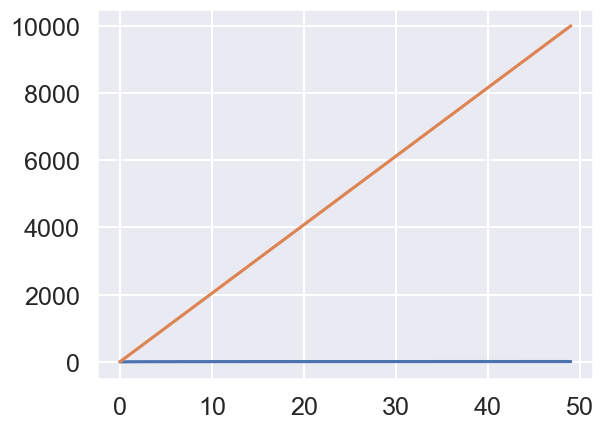

In [347]:
a = 0.1
b = 100
n_c = 100
plt.plot([np.divide(a*i, b + i)*n_c for i in np.linspace(0, 1000)])

plt.plot([a*i*n_c for i in np.linspace(0, 1000)])

# n_c = 100
# plt.plot([np.divide(a*i, b + i)*n_c for i in np.linspace(0, 1000)])

# n_c = 1000
# plt.plot([np.divide(a*i, b + i)*n_c for i in np.linspace(0, 1000)])

In [172]:
U_simp_2

matrix([[0.      , 0.      , 0.      , 0.      , 0.      ],
        [0.99    , 0.299475, 0.      , 0.      , 0.      ],
        [0.      , 0.4455  , 0.5445  , 0.      , 0.      ],
        [0.      , 0.4455  , 0.4455  , 0.8415  , 0.      ],
        [0.      , 0.      , 0.      , 0.1485  , 0.95    ]])

In [173]:
fund_mat = np.linalg.inv(np.identity(5) - U_simp_2)

In [174]:
fund_mat

matrix([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 1.41322579,  1.4275008 ,  0.        ,  0.        ,  0.        ],
        [ 1.38219998,  1.3961616 ,  2.19538968,  0.        ,  0.        ],
        [ 7.85717466,  7.93654006,  6.17063787,  6.30914826,  0.        ],
        [23.33580874, 23.57152398, 18.32679449, 18.73817035, 20.        ]])

In [109]:
γ_JE  = 1
γ_RAJ = 0.45
γ_OR = 0.15
# δ_E = 0.95
# δ_J = 0.95
#δ_RA = 0.95

δ_E = 1
δ_J = 1
δ_RA = 1
δ_OA = 0.95

U_simp = np.matrix([[δ_E*(1 - γ_JE),               0,               0,    0],
                    [      δ_E*γ_JE, δ_J*(1 - γ_RAJ),               0,    0],
                    [             0,       δ_J*γ_RAJ, δ_RA*(1 - γ_OR),    0],
                    [             0,               0,       δ_RA*γ_OR, δ_OA]])

In [118]:
np.linalg.inv(np.identity(4) - U_simp)

matrix([[ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 2.17343578,  2.19538968,  0.        ,  0.        ],
        [ 6.1089315 ,  6.17063787,  6.30914826,  0.        ],
        [18.14352654, 18.32679449, 18.73817035, 20.        ]])

In [119]:
fund_mat = np.linalg.inv(np.identity(4) - U_simp)

In [120]:
np.linalg.eig(fund_mat*F)[0]

array([  0.        ,   0.        ,   0.        , 137.45095867])

In [165]:
def simp_consum_resource(n0, r0, α, θ, t):
    c = 0.1
    γ_JE  = 1
    γ_RAJ = 0.45
    γ_OR = 0.15
    δ_E = lambda r: 0.99  *(r)/(α + r) if r >=0 else 0.0
    δ_J = lambda r: 0.99 *(r)/(α + r) if r  >=0 else 0.0
    δ_RA = lambda r: 0.99 *(r)/(α + r) if r >=0 else 0.0
    δ_OA = lambda r: 0.95 *(r)/(α + r) if r >=0 else 0.0
    F = np.identity(4) * 0
    F[0][2] = γ_OR*150
    n_list = []
    r_list = []
    for i in range(t):
        U_simp = np.matrix([[δ_E(r0)*(1 - γ_JE),               0,               0,    0],
                            [      δ_E(r0)*γ_JE, δ_J(r0)*(1 - γ_RAJ),               0,    0],
                            [             0,       δ_J(r0)*γ_RAJ, δ_RA(r0)*(1 - γ_OR),    0],
                            [             0,               0,       δ_RA(r0)*γ_OR, δ_OA(r0)]])
        n0 = np.array(np.matmul(U_simp + F, n0))
        r0 = 2*r0 + θ - c*np.sum(n0)
        if r0 < 0:
            r0 = 0.0
        n_list.append(n0)
        r_list.append(r0)
    return n_list, r_list

In [168]:
n0 = np.array([[0], [50], [0], [0]])
r0 = 1000
α = 100
θ = 10
test = simp_consum_resource(n0, r0, α, θ, 20)

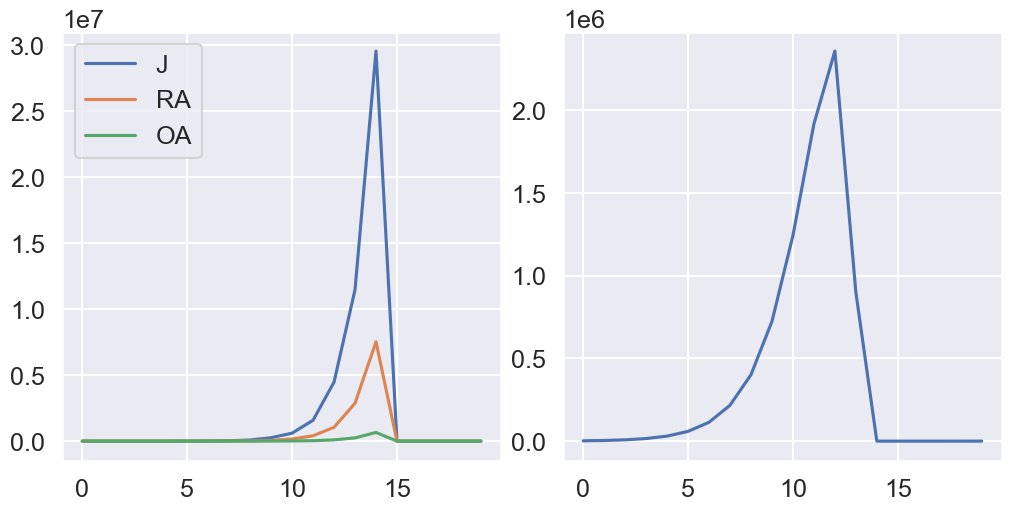

In [169]:
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(10, 5),
    constrained_layout=True)

axes = axes.flatten()

# for i,j in zip(range(4), ['E', 'J', 'RA', 'OA']):
#     plt.plot([m[i][0] for m in n_list], label=j)

for i,j in zip(np.arange(1, 4, 1), ['J', 'RA', 'OA']):
    axes[0].plot([m[i][0] for m in test[0]], label=j)
    
axes[1].plot(test[1])
    
axes[0].legend()

In [142]:
γ_RAJ = lambda r : 0.45*(r)/(α + r) if r >=0 else 0.0

In [144]:
γ_RAJ(10)

0.04090909090909091

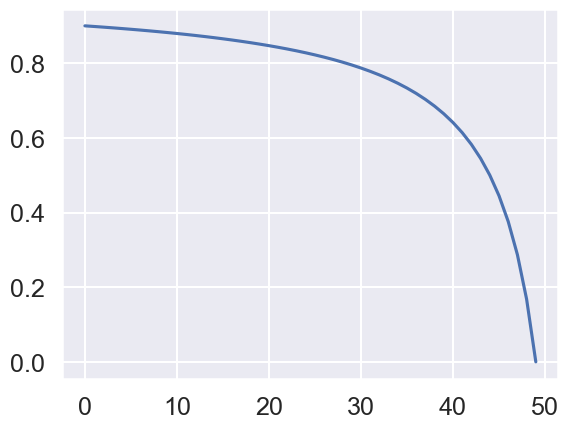

In [242]:
α = 100
plt.plot([δ_RA * (i)/(α + i)*() for i in np.linspace(1000, 0)])

In [146]:
np.sum(n0)

14683.765955078123

In [100]:
F = np.identity(4) * 0
F[0][2] = γ_OR*150

In [101]:
F

array([[ 0. ,  0. , 22.5,  0. ],
       [ 0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ]])

In [49]:
U_simp

matrix([[0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.475 , 0.    , 0.    ],
        [0.    , 0.475 , 0.8075, 0.    ],
        [0.    , 0.    , 0.1425, 0.95  ]])

In [89]:
n0 = np.array([[0], [50], [0], [0]])

In [90]:
n_list = []
for i in range(5):
    n0 = np.array(np.matmul(U_simp + F, n0))
    n_list.append(n0)

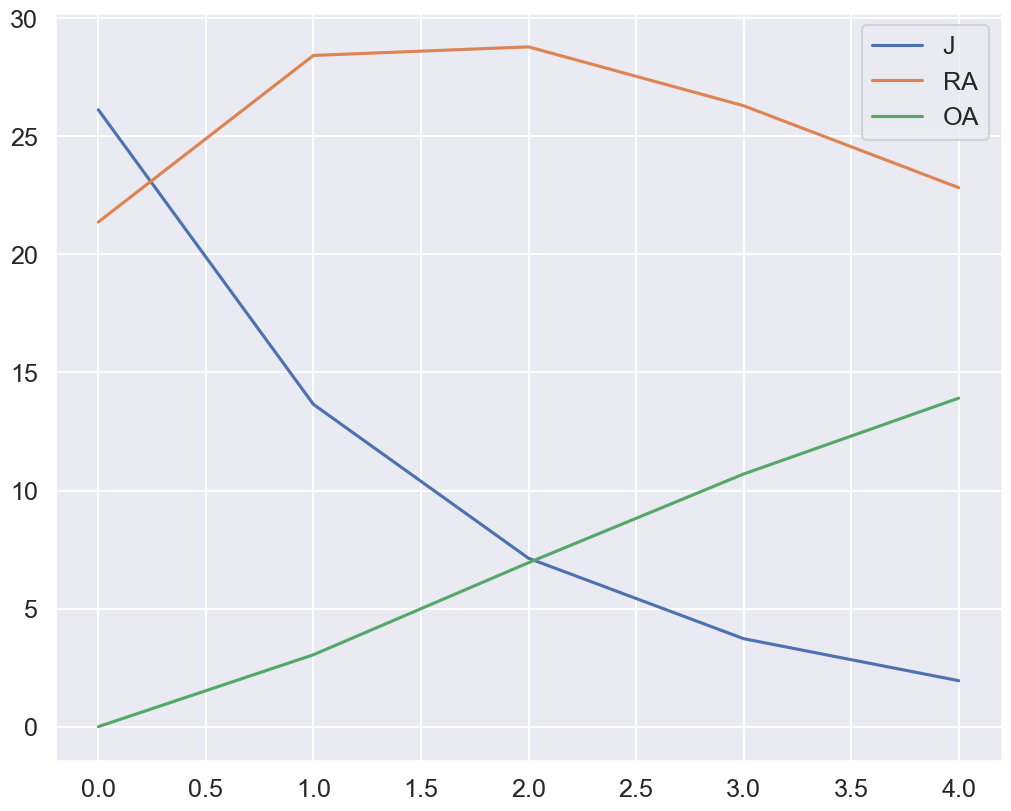

In [92]:
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(10, 8),
    constrained_layout=True)

# for i,j in zip(range(4), ['E', 'J', 'RA', 'OA']):
#     plt.plot([m[i][0] for m in n_list], label=j)

for i,j in zip(np.arange(1, 4, 1), ['J', 'RA', 'OA']):
    plt.plot([m[i][0] for m in n_list], label=j)
    
plt.legend()

In [29]:
np.array(np.matmul(U_simp + F, n0))

array([[1.500e+02],
       [0.000e+00],
       [8.075e-01],
       [1.425e-01]])

In [22]:
np.linalg.eig(np.identity(4) - U_simp)

(array([0.05  , 0.1925, 0.525 , 1.    ]),
 matrix([[ 0.        ,  0.        ,  0.        ,  0.65180044],
         [ 0.        ,  0.        ,  0.5568901 , -0.65180044],
         [ 0.        ,  0.70710678, -0.79555728,  0.38341202],
         [ 1.        , -0.70710678,  0.23866719, -0.0575118 ]]))

In [23]:
np.linalg.inv(np.identity(4) - U_simp)

matrix([[ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.9047619 ,  1.9047619 ,  0.        ,  0.        ],
        [ 2.23252938,  4.70006184,  5.19480519,  0.        ],
        [ 6.36270872, 13.39517625, 14.80519481, 20.        ]])

In [27]:
ge = g2 = g3 = g4  = gya  = 0.0
g2d = 0.1
gd4 = 0.0
gb1 = gb2 = gb3 = gb4 = gb4 = gb5 = 0.0415
d_e = 0.995
d = 0.995 
d_dauer = 1.
doa = 0.995 #
U_starv = np.matrix([[d_e*(1. - ge), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [d_e*ge, d*(1. - g2) * (1. - g2d), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, d_dauer*g2d,d_dauer*(1. - gd4), 0, 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, d*g2, 0, d*(1. - g3), 0, 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, d_dauer*gd4, d*g3, d*(1. - g4), 0, 0, 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, d*g4, d*(1. - gya), 0, 0, 0, 0, 0, 0],  
                      [0, 0, 0, 0, 0, d*gya, d*(1. - gb1), 0, 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, d*gb1, d*(1. - gb2), 0, 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, d*gb2, d*(1 - gb3), 0, 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, d*gb3, d*(1 - gb4), 0, 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, d*gb4, d*(1 - gb5), 0],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, d*gb5, doa]])

In [31]:
np.linalg.det(U_starv)

0.6890599109957548

In [34]:
np.linalg.det(np.identity(12) - U_starv)

0.0

In [15]:
γ_e = 0.0415
γ_J = 0.05
γ_RA = 0.05

δ_e = δ_J = δ_RA = 1
δ_OA = 1

U = np.matrix([[δ_e*(1. - γ_e), 0,                           0,    0],
               [δ_e*γ_e,        δ_J*(1 - γ_J),               0,    0],
               [0,              δ_J*γ_J      , δ_RA*(1 - γ_RA),    0],
               [0,              0.           , δ_RA*γ_RA      , δ_OA]])

In [26]:
δ_J*(1 - γ_J)

0.95

In [21]:
U = np.matrix([[0, 0,                           0,    0, 0],
               [0.9,        0.85,               0,    0],
               [0,              0.12      , 0,    0],
               [0,              0.           ,0 , 0]])

matrix([[0.9585, 0.    , 0.    , 0.    ],
        [0.0415, 0.95  , 0.    , 0.    ],
        [0.    , 0.05  , 0.95  , 0.    ],
        [0.    , 0.    , 0.05  , 1.    ]])

In [17]:
n = np.array([[50], [0], [0], [0]])

In [25]:
np.identity(4) - U

matrix([[ 0.0415,  0.    ,  0.    ,  0.    ],
        [-0.0415,  0.05  ,  0.    ,  0.    ],
        [ 0.    , -0.05  ,  0.05  ,  0.    ],
        [ 0.    ,  0.    , -0.05  ,  0.    ]])

In [35]:
def get_transition_probs(strain, food_type):
    ge = 0.0415
    g2 = 0.055
    g3 = 0.085
    g4  = 0.07
    gya  = 0.1
    gb1 = gb2 = gb3 = gb4 = gb4 = gb5= 0.0415
    doa = 0.995

    if food_type == 'Novo':
        if strain == 'A':
            gya  = 0.13 # ~8 hours
        elif strain == 'C':
            gya  = 0.4 # ~ 6 hours

    U = np.matrix([[(1. - ge), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [ge, (1. - g2), 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, g2, (1. - g3), 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, g3, (1. - g4), 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, g4, (1. - gya), 0, 0, 0, 0, 0, 0], 
                   [0, 0, 0, 0, gya, (1. - gb1), 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, gb1, (1. - gb2), 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, gb2, (1 - gb3), 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, gb3, (1 - gb4), 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, gb4, (1 - gb5), 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, gb5, doa]])
    return U

In [36]:
mat = get_transition_probs('A', 'Novo')

In [39]:
np.matrix([[0, 0, 0, 0, 0],
           [0.90, 0.85, 0, 0, 0],
           [0, 0.12, 0.71, 0, 0]]

matrix([[ 0.0415,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ],
        [-0.0415,  0.055 ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    , -0.055 ,  0.085 ,  0.    ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    , -0.085 ,  0.07  ,  0.    ,  0.    ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    , -0.07  ,  0.13  ,  0.    ,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    , -0.13  ,  0.0415,  0.    ,
          0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.0415,  0.0415,
          0.    ,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.0415,
          0.0415,  0.    ,  0.    ,  0.    ],
        [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0